In [11]:
!pip install pyqt5

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import json
import time

import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, FFMpegWriter
from IPython.display import display, HTML
import ipywidgets as widgets
from scipy.spatial.transform import Rotation

import mediapipe as mp

In [5]:
!ls

'Processing some landmark.ipynb'   nao_robot
 README.md			   nohup.out
 animation.mp4			   processing_static_landmarks.ipynb
 media				   resourcesfrompreviousresearch
 mediapipe_posture_estimator	   testing.mp4
 mp_pose_estimation_mechanism.py   yolov7_posture_estimator
 mp_script.py


In [8]:
!ls media

animation.gif	       frani_pose.mp4	testing.gif
frame_extractor.ipynb  frani_pose1.jpg


In [11]:
images = [cv2.imread("media/frani_pose1.jpg"), cv2.imread("media/frani_pose2.jpg")]
images[0] = cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB)
images[1] = cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB)

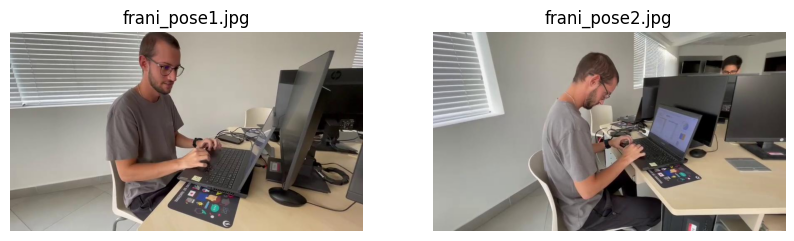

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image
axes[0].imshow(images[0])
axes[0].axis('off')
axes[0].set_title("frani_pose1.jpg")

# Plot the second image
axes[1].imshow(images[1])
axes[1].axis('off')
axes[1].set_title("frani_pose2.jpg")

plt.show()

In [15]:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

processed_img = []

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    
    for frame in images:

        # Convert the BGR frame to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_rgb.flags.writeable = False

        # Perform pose estimation
        results = pose.process(frame_rgb)

        # Draw the pose landmarks on the frame
        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        processed_img += [frame]
      


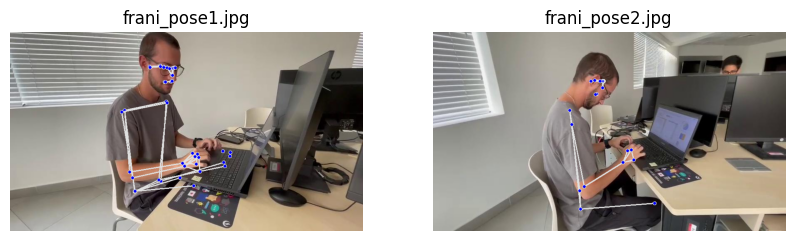

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image
axes[0].imshow(processed_img[0])
axes[0].axis('off')
axes[0].set_title("frani_pose1.jpg")

# Plot the second image
axes[1].imshow(processed_img[1])
axes[1].axis('off')
axes[1].set_title("frani_pose2.jpg")

plt.show()

In [80]:
landmarks, visibles = parse_landmarks(raw_landmarks)

In [81]:
axis = np.array([0, 1, 0]) 
angular_speed = 3
rotation_angle = np.deg2rad(angular_speed)

rotation = Rotation.from_rotvec(rotation_angle * axis)

In [82]:

def plot_person(index):
    global rotation_angle
    ax.clear()
    
    frame_final = landmarks[index]

    visibility = visibles[index]
    minimum_visibility = 0.5
    
    # Plot the 3D body lines
    for connection in mp_pose.POSE_CONNECTIONS:
        joint1 = connection[0]dd
        joint2 = connection[1]
        if visibility[joint1] > minimum_visibility and visibility[joint2] > minimum_visibility:
            x = [frame_final[joint1][0], frame_final[joint2][0]]
            y = [frame_final[joint1][1], frame_final[joint2][1]]
            z = [frame_final[joint1][2], frame_final[joint2][2]]

            ax.plot(x, y, z, c='r')
        
    # Plot the 3D body landmarks as dots
    x = [landmark[0] for i, landmark in enumerate(frame_final) if visibility[i] > minimum_visibility]
    y = [landmark[1] for i, landmark in enumerate(frame_final) if visibility[i] > minimum_visibility]
    z = [landmark[2] for i, landmark in enumerate(frame_final) if visibility[i] > minimum_visibility]
    ax.scatter(x, y, z, c='b')
    
    # Set the plot limits
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    
    return ax

<Axes3D: >

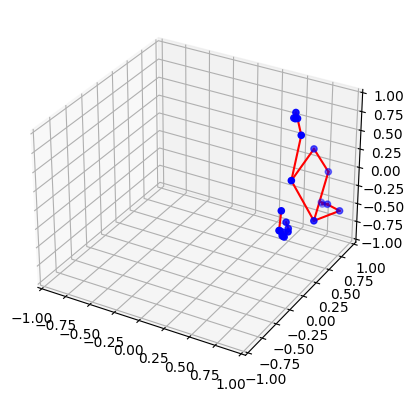

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot_person(80)

In [84]:
landmarks.shape

(131, 33, 3)

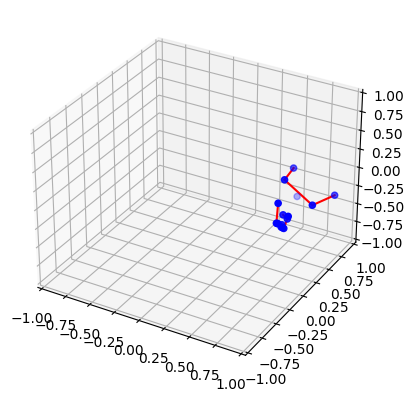

In [85]:
plt.rcParams['animation.embed_limit'] = 50.0  # Increase the embedding limit to 50 MB

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
def update(index):
    ax.cla()
    plot_person(index)

# Create the animation
animation = FuncAnimation(fig, update, frames=len(landmarks), interval=15)

# Display the animation in Jupyter Notebook

In [60]:
# Set up the video writer
writer = FFMpegWriter(fps=30, metadata=dict(artist='Me'), bitrate=1800)

# Save the animation as a video
animation.save('animation.mp4', writer=writer)

In [61]:
!ls

'Processing some landmark.ipynb'   mediapipe_posture_estimator
 README.md			   nohup.out
 animation.mp4			   testing.webm
 media				   yolov7_posture_estimator


In [62]:
widget1 = widgets.Video.from_file('testing.webm')
widget2 = widgets.Video.from_file('animation.mp4')

# Create the custom box layout with fixed width
box_layout = widgets.Layout(width='800px')

# Create the box container and add the videos
box = widgets.Box(children=[widget1, widget2], layout=box_layout)

# Display the box container
display(box)

Box(children=(Video(value=b'\x1aE\xdf\xa3\x9fB\x86\x81\x01B\xf7\x81\x01B\xf2\x81\x04B\xf3\x81\x08B\x82\x84webm…

In [25]:
!mkdir media
!ffmpeg -i testing.webm media/testing.gif
!ffmpeg -i animation.mp4 media/animation.gif

ffmpeg version n6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 13.1.1 (GCC) 20230429
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libjxl --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librav1e --enable-librsvg --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable

frame=  153 fps=135 q=-0.0 Lsize=    9052kB time=00:00:05.07 bitrate=14625.8kbits/s speed=4.48x    
video:9052kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.000216%
ffmpeg version n6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 13.1.1 (GCC) 20230429
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libjxl --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librav1e --enable-librsvg --enable-libsoxr --enable-libspeex -